# EXPLORATORY DATA ANALYSIS (EDA) of Superstore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

In [2]:
df = pd.read_csv('Superstore.csv', encoding='latin1')

# Overview of Superstore Dataset
       1- Check for missing values in whole dataset
       2- Check for duplicate values in dataset
       3- Check the data types
       4- Check shape of dataset

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Check for null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Shape of dataset
df.shape

(9994, 21)

# Superstore dataset contains:
     - 9994 rows -> total number of records
     - 21 columns -> total number of features
no duplicate,missing values found

# Step 1: Convert and clean dataset

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
# Converted date columns to date
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [11]:
# Ensure numeric columns
for col in ['Sales', 'Profit', 'Discount', 'Quantity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [12]:
# Add profit margin column
df['Profit Margin %'] = (df['Profit'] / df['Sales'])*100

# Step 2: Summary Statistics

In [13]:
display(df.describe())

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin %
count,9994.00,9994,9994,9994.00,9994.00,9994.00,9994.00,9994.00,9994.00
mean,4997.50,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.38,229.86,3.79,0.16,28.66,12.03
min,1.00,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.00,0.44,1.00,0.00,-6599.98,-275.00
25%,2499.25,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.00,17.28,2.00,0.00,1.73,7.50
50%,4997.50,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.50,54.49,3.00,0.20,8.67,27.00
75%,7495.75,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.00,209.94,5.00,0.20,29.36,36.25
max,9994.00,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.00,22638.48,14.00,0.80,8399.98,50.00
std,2885.16,NaN,NaN,32063.69,623.25,2.23,0.21,234.26,46.68


# Step 3: Key Performance Indicators (KPIs)

In [29]:
# Compute KPIs
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_discount = df['Discount'].mean()
total_quantity = df['Quantity'].sum()
avg_profit_margin = (df['Profit'].sum() / df['Sales'].sum()) * 100

In [31]:
# Most profitable region & segment
region_profit = df.groupby('Region')['Profit'].sum().idxmax()
segment_profit = df.groupby('Segment')['Profit Margin %'].mean().idxmax()

In [32]:
# Create KPI summary table
kpi_data = {
    'KPI': [
        'Total Sales',
        'Total Profit',
        'Average Discount',
        'Total Quantity Sold',
        'Average Profit Margin (%)',
        'Most Profitable Region',
        'Top Customer Segment'
    ],
    'Value': [
        f"${total_sales:,.2f}",
        f"${total_profit:,.2f}",
        f"{avg_discount*100:.2f}%",
        f"{total_quantity:,}",
        f"{avg_profit_margin:.2f}%",
        region_profit,
        segment_profit
    ]
}

kpi_df = pd.DataFrame(kpi_data)
display(kpi_df.style.set_caption("Business Performance Summary"))


,KPI,Value
0,Total Sales,"$2,297,200.86"
1,Total Profit,"$286,397.02"
2,Average Discount,15.62%
3,Total Quantity Sold,"37,873"
4,Average Profit Margin (%),12.47%
5,Most Profitable Region,West
6,Top Customer Segment,Home Office


# Step 4: Distribution of Numerical Features 

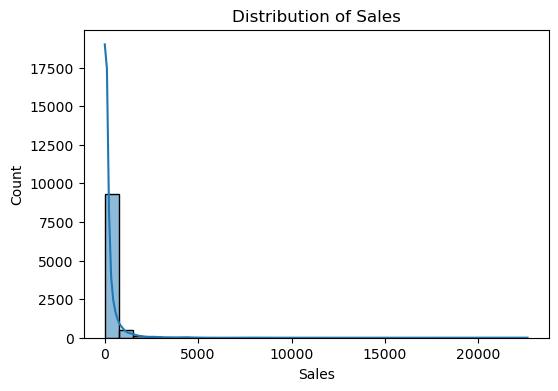

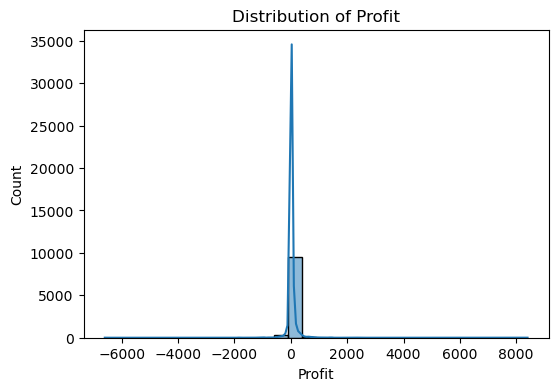

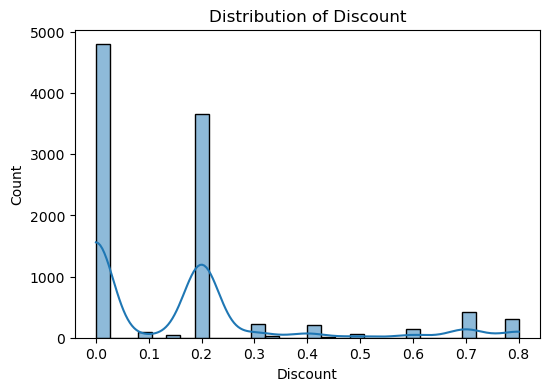

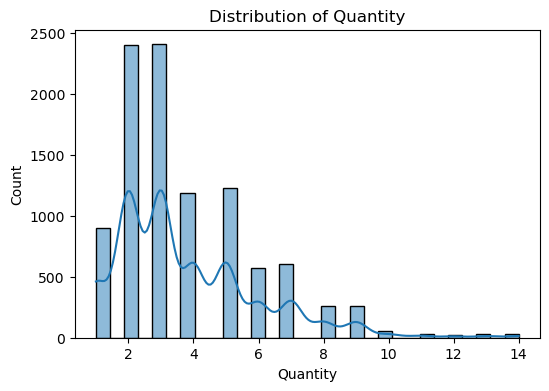

In [14]:
num_cols = ['Sales', 'Profit', 'Discount', 'Quantity']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

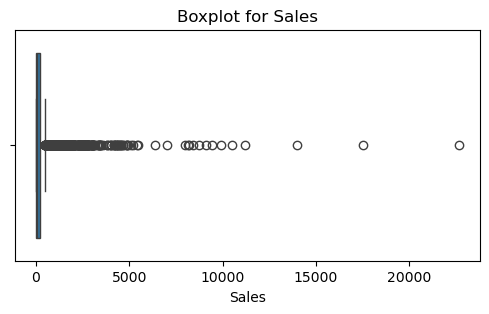

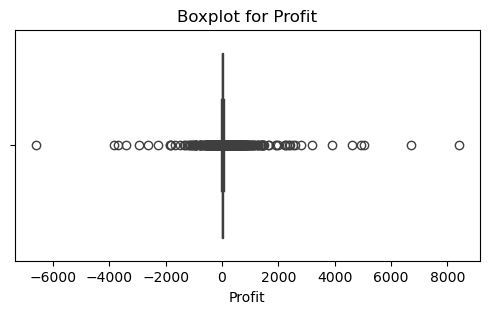

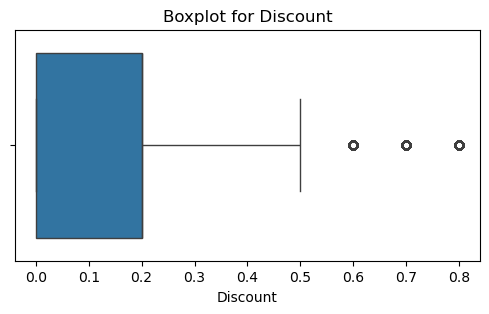

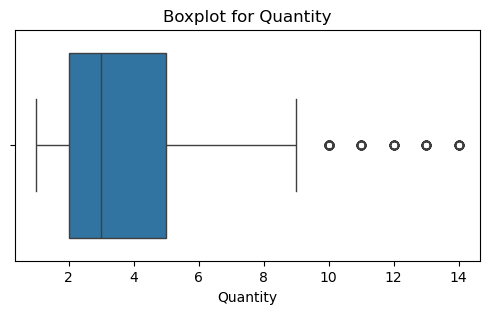

In [15]:
# Boxplots to identify outliers
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Step 5: Categorical Features (categorical data exploration)

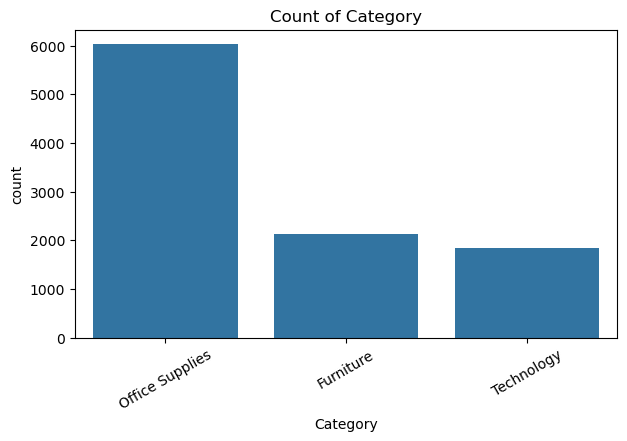

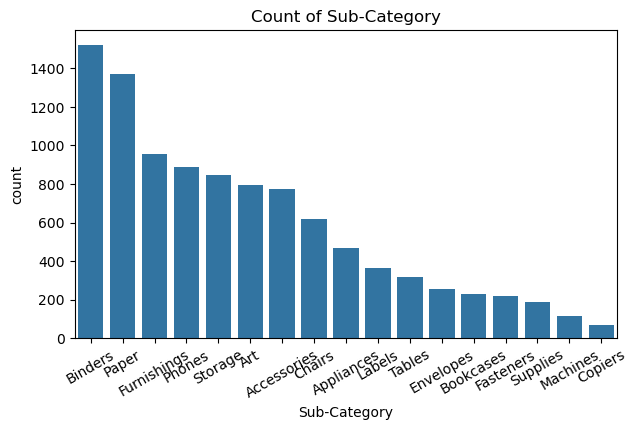

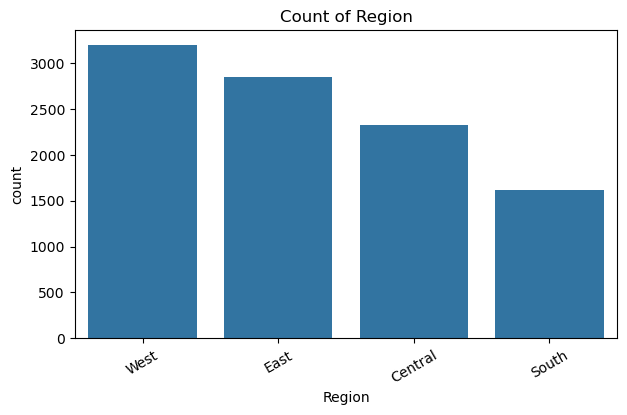

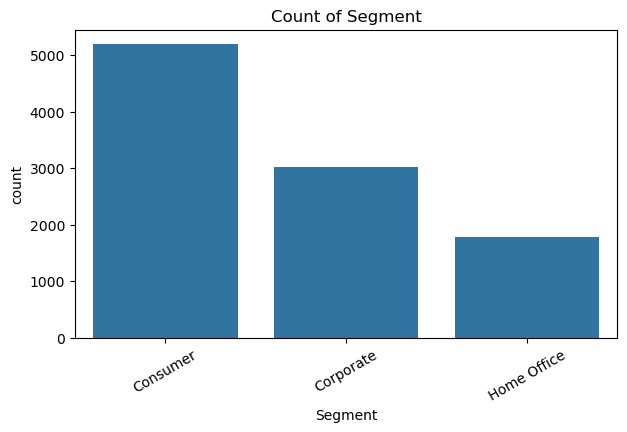

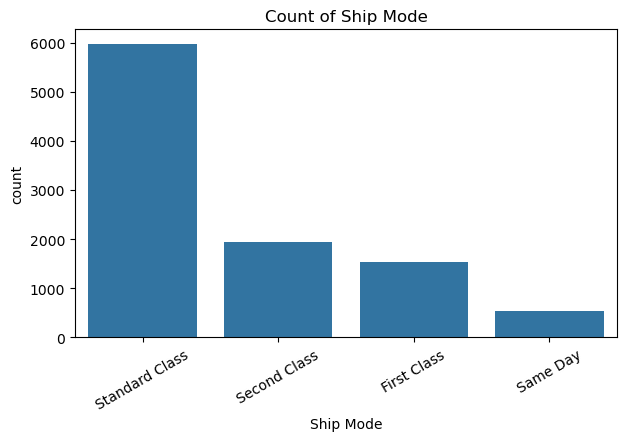

In [16]:
cat_cols = ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=30)
    plt.show()

# Step 6: Correlation & Heatmap (correlation matrix)

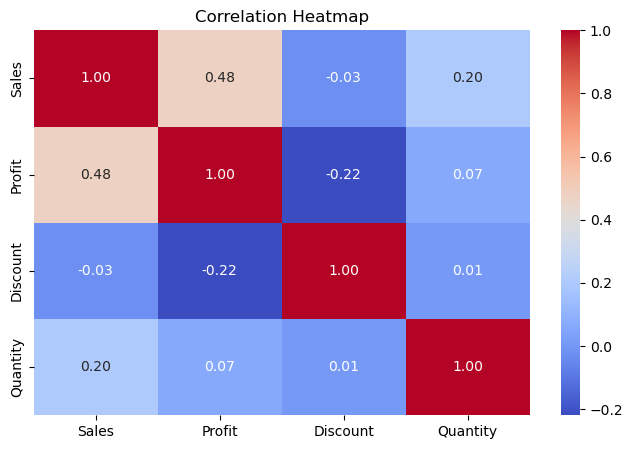

In [17]:
corr = df[num_cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Business Analysis Summaries

In [18]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,11.25


# Top 10 Sub-Categories by Profit

In [19]:
sub_profit = df.groupby('Sub-Category', as_index=False).agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
sub_profit['Profit Margin (%)'] = (sub_profit['Profit'] / sub_profit['Sales']) * 100
top_sub_profit = sub_profit.sort_values(by='Profit', ascending=False).head(10)

In [20]:
print("Top 10 Sub-Categories by Total Profit:")
display(top_sub_profit)

Top 10 Sub-Categories by Total Profit:


,Sub-Category,Sales,Profit,Profit Margin (%)
6,Copiers,149528.03,55617.82,37.20
13,Phones,330007.05,44515.73,13.49
0,Accessories,167380.32,41936.64,25.05
12,Paper,78479.21,34053.57,43.39
3,Binders,203412.73,30221.76,14.86
5,Chairs,328449.10,26590.17,8.10
14,Storage,223843.61,21278.83,9.51
1,Appliances,107532.16,18138.01,16.87
9,Furnishings,91705.16,13059.14,14.24
7,Envelopes,16476.40,6964.18,42.27


In [21]:
bottom_sub_profit = sub_profit.sort_values(by='Profit', ascending=True).head(10)

In [22]:
print("Bottom 10 Sub-Categories by Profit (Loss-Making):")
display(bottom_sub_profit)

Bottom 10 Sub-Categories by Profit (Loss-Making):


,Sub-Category,Sales,Profit,Profit Margin (%)
16,Tables,206965.53,-17725.48,-8.56
4,Bookcases,114880.00,-3472.56,-3.02
15,Supplies,46673.54,-1189.10,-2.55
8,Fasteners,3024.28,949.52,31.40
11,Machines,189238.63,3384.76,1.79
10,Labels,12486.31,5546.25,44.42
2,Art,27118.79,6527.79,24.07
7,Envelopes,16476.40,6964.18,42.27
9,Furnishings,91705.16,13059.14,14.24
1,Appliances,107532.16,18138.01,16.87


# Category-wise Summary (Sales, Profit, Discount)

In [23]:
cat_summary = df.groupby('Category', as_index=False).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Discount': 'mean'
})
cat_summary['Profit Margin (%)'] = (cat_summary['Profit'] / cat_summary['Sales']) * 100
print("Category-wise Summary:")
display(cat_summary)


Category-wise Summary:


,Category,Sales,Profit,Discount,Profit Margin (%)
0,Furniture,741999.80,18451.27,0.17,2.49
1,Office Supplies,719047.03,122490.80,0.16,17.04
2,Technology,836154.03,145454.95,0.13,17.40


# Step 8: Regional Profitability

In [24]:
region_summary = df.groupby('Region', as_index=False).agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
region_summary['Profit Margin (%)'] = (region_summary['Profit'] / region_summary['Sales']) * 100
print("Regional Profitability:")
display(region_summary.sort_values(by='Profit', ascending=False))

Regional Profitability:


,Region,Sales,Profit,Profit Margin (%)
3,West,725457.82,108418.45,14.94
1,East,678781.24,91522.78,13.48
2,South,391721.91,46749.43,11.93
0,Central,501239.89,39706.36,7.92


# Step 9: Segment-wise Profitability

In [25]:
segment_summary = df.groupby('Segment', as_index=False).agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
segment_summary['Profit Margin (%)'] = (segment_summary['Profit'] / segment_summary['Sales']) * 100
print("Segment-wise Profitability:")
display(segment_summary.sort_values(by='Profit', ascending=False))

Segment-wise Profitability:


,Segment,Sales,Profit,Profit Margin (%)
0,Consumer,1161401.34,134119.21,11.55
1,Corporate,706146.37,91979.13,13.03
2,Home Office,429653.15,60298.68,14.03


# Top 10 States by Profit

In [26]:
state_summary = df.groupby('State', as_index=False).agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
state_summary['Profit Margin (%)'] = (state_summary['Profit'] / state_summary['Sales']) * 100
top_states = state_summary.sort_values(by='Profit', ascending=False).head(10)
print("Top 10 States by Profit:")
display(top_states)

Top 10 States by Profit:


,State,Sales,Profit,Profit Margin (%)
3,California,457687.63,76381.39,16.69
30,New York,310876.27,74038.55,23.82
45,Washington,138641.27,33402.65,24.09
20,Michigan,76269.61,24463.19,32.07
44,Virginia,70636.72,18597.95,26.33
12,Indiana,53555.36,18382.94,34.33
9,Georgia,49095.84,16250.04,33.10
15,Kentucky,36591.75,11199.70,30.61
21,Minnesota,29863.15,10823.19,36.24
6,Delaware,27451.07,9977.37,36.35


# Discount vs Profit Relationship

In [27]:
# Create discount bins
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
labels = ['0.00–0.10', '0.10–0.20', '0.20–0.30', '0.30–0.40', '0.40–0.50', '>0.50']
df['Discount Range'] = pd.cut(df['Discount'], bins=bins, labels=labels, include_lowest=True)

discount_summary = df.groupby('Discount Range', as_index=False).agg({
    'Profit': 'mean',
    'Sales': 'mean'
})
discount_summary['Profit Margin (%)'] = (discount_summary['Profit'] / discount_summary['Sales']) * 100
print("\n💸 Discount vs Profit Relationship:")
display(discount_summary)


💸 Discount vs Profit Relationship:


C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_11304\535197516.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby('Discount Range', as_index=False).agg({


,Discount Range,Profit,Sales,Profit Margin (%)
0,0.00–0.10,67.46,233.50,28.89
1,0.10–0.20,24.74,213.58,11.58
2,0.20–0.30,-45.68,454.74,-10.05
3,0.30–0.40,-109.22,561.85,-19.44
4,0.40–0.50,-298.70,836.41,-35.71
5,>0.50,-89.44,75.03,-119.20


# Correlation Summary

In [28]:
num_cols = df[['Sales', 'Profit', 'Discount', 'Quantity']].corr()
print("\n📈 Correlation Summary (Numeric Variables):")
display(num_cols)


📈 Correlation Summary (Numeric Variables):


,Sales,Profit,Discount,Quantity
Sales,1.00,0.48,-0.03,0.20
Profit,0.48,1.00,-0.22,0.07
Discount,-0.03,-0.22,1.00,0.01
Quantity,0.20,0.07,0.01,1.00


# Step 10: Relationship Visualizations

## Sales VS Profit

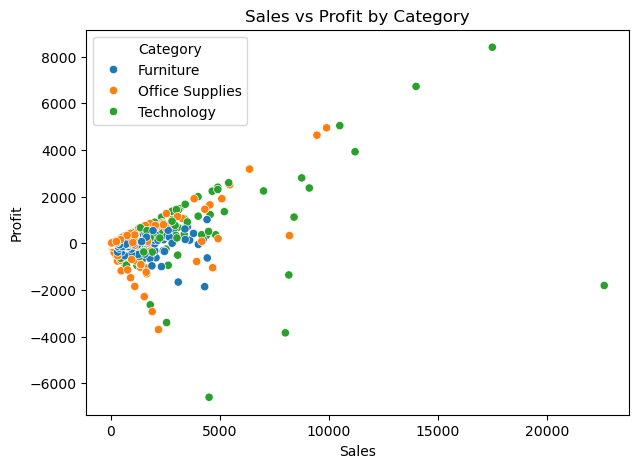

In [36]:
# Sales vs Profit
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title("Sales vs Profit by Category")
plt.show()

## Discount VS Profit

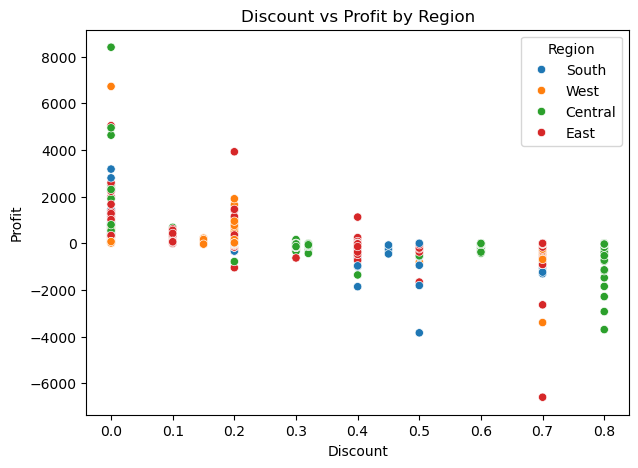

In [38]:
# Discount vs Profit
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Region')
plt.title("Discount vs Profit by Region")
plt.show()

## Category VS Profit

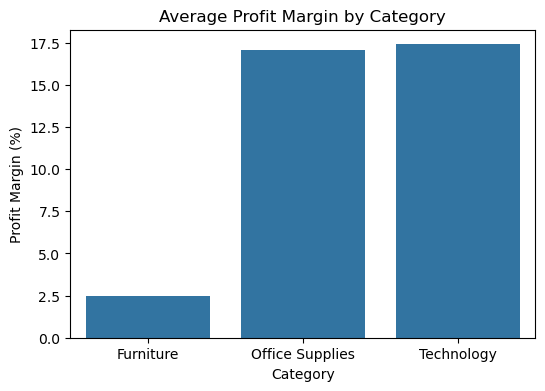

In [39]:
# Category vs Profit Margin
plt.figure(figsize=(6, 4))
sns.barplot(data=cat_summary, x='Category', y='Profit Margin (%)')
plt.title("Average Profit Margin by Category")
plt.show()

# KEY INSIGHTS

## 1: Business Understanding & Goal Setting:
    - Business goal: Improve profitability and identify loss-making categories, sub-categories, 
      and regions so management can adjust pricing, discounting, and stock mix.
    - Research question: What factors (category, discount, quantity, region, segment) most strongly affect profit?
    - Key variables: Sales, Profit, Discount, Quantity, Category, Sub-Category, Region, Segment.
    - KPI / Success Metric: Overall Profit Margin (%) and Average Sales per Order (monitor improvement after interventions).

## 2: Importing & Inspecting the Data:
    - Dataset shape: 9,994 rows × 21 columns.
    - Preview: The dataset includes order metadata (Order ID, dates), product metadata (Category, Sub-Category, Product Name),
      and numeric metrics (Sales, Quantity, Discount, Profit).
    - Missing-values: No columns with systematic missing values were detected in the scan (missing_count = 0 for most columns).
    - Data types: Mixed — datetimes for order/ship dates (converted), numeric for Sales/Profit, categorical for Category/Region/Segment.

## 3: Handling Missing Data:
    - Finding: The dataset has negligible missingness (scan result: no major missing columns to impute).
    - Strategy: If any categorical column later shows a few missing entries, impute with mode (or mark as 'Unknown'); for numeric, 
    impute with median if small count. Document any imputation decisions in a table in the notebook.

## 4: Exploring Data Characteristics:
    - Distributions: Sales and Profit are right-skewed (long tails). Profit includes negative values (loss-making transactions).
    - Spread & outliers: IQR & Z-score methods show outliers in both Sales and Profit (valid large transactions and some large losses).
    - Key stats (see KPIs below).

## 5: Visualizing Relationships:
    - Visuals included: histograms, boxplots, QQ-plots, correlation matrix (numeric only), counts & barplots for categories,
    scatter plot Sales vs Profit.
    - Initial insight: Sales and Profit are positively correlated generally, but high discounts can create negative profit even when sales are high.

## 6: Handling Outliers:
    - Method used: IQR and Z-score.
    - Decision: Keep most outliers for now because they appear to be valid transactions (large orders). 
      Remove only if investigation shows data-entry error.

## Step 11: Summary of Findings:
      1- Copiers and Phones are top profit contributors. 
      2- Tables and Bookcases frequently cause losses.  
      3- West region is the most profitable and Central lags behind.  
      4- Home Office segment yields the highest margin.  
      5- Higher discounts (>30%) drastically reduce profits.  
      6- Sales & Profit show a moderate positive correlation.  
      7- Discount & Profit are negatively correlated.
      8- The Category 'Technology' has highest profit margin amongst other categories.

# Recommendations:
    1- Reduce excessive discounting, focus on profitable sub-categories and category, and replicate successful regional models.
    2- Review discounting policy for categories/sub-categories with negative profit.
    3- Prioritize marketing and inventory for high-margin categories.
    4- Investigate orders with large negative profit (top negative profit rows shown in the notebook).
    5- Use the profit margin KPI to measure impact after changes.
   

In [40]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Superstore EDA Report", explorative=True)
profile.to_file("superstore_eda_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 16.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]